# Allometry

In biological systems, emperical models are sometimes discovered that mathematically relate one biological (often anatomical) measurement with another. **Allometry** is the general study of emperical relationships in biological systems. Typically there are no theoretical models to predict such a relationship. Therefore, allometric relationships are **emperical models**.

This 2015 paper by Jean Gayon, [History of the Concept of Allometry](https://academic.oup.com/icb/article/40/5/748/157095), describes the history of the field of allometry and especially the work of pioneers Huxley and Teissier.

In this excellent summary of the field of allometry, [Allometry: The Study of Biological Scaling](https://www.nature.com/scitable/knowledge/library/allometry-the-study-of-biological-scaling-13228439/), the author states:

    Allometry, in its broadest sense, describes how the characteristics of living creatures change with size. The term originally referred to the scaling relationship between the size of a body part and the size of the body as a whole, as both grow during development. However, more recently the meaning of the term allometry has been modified and expanded to refer to biological scaling relationships in general, be it for morphological traits (e.g., the relationship between brain size and body size among adult humans), physiological traits (e.g., the relationship between metabolic rate and body size among mammal species) or ecological traits (e.g., the relationship between wing size and flight performance in birds). Indeed, allometric relationships can be described for almost any co-varying biological measurements, resulting in broad usage of the term. However, a unifying theme is that allometry describes how traits or processes scale with one another. The study of allometry concerns the functional mechanisms that generate these scaling relationship, how they impact ecology, and how they respond to and influence evolution.

## Example - Brain Weight vs. Body Weight

Let's look at an example of brain weight in grams vs. body weight in kg for various mammals. Data is in the file `brain-weight-body-weight.txt`. ([data source](http://dx.doi.org/10.6084/m9.figshare.1565651.v1))

In [18]:
#import packages used in the lesson
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

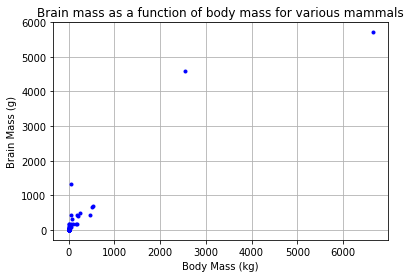

In [19]:
# read the data file
df = pd.read_csv('brain-weight-body-weight.txt', sep='\t')
df.head()

# assign variable names to the columns of data; these variables are lists
xdata = df['Body Mass (kg)']
ydata = df['Brain Mass (g)']

# plot data
fig = plt.figure()
plt.title("Brain mass as a function of body mass for various mammals")
plt.plot(xdata, ydata, 'b.')
plt.grid(which='both', axis='both')
plt.xlabel('Body Mass (kg)')
plt.ylabel('Brain Mass (g)')
plt.show()


## Log-Log Plot

Instead of calling the `plot()` function to plot the data, use the `loglog()` function which works just like `plot()` but uses a logarithmic scale for both axes.

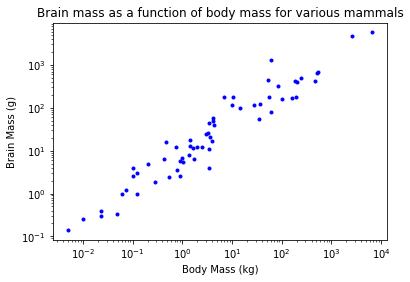

In [20]:
fig = plt.figure()
plt.title("Brain mass as a function of body mass for various mammals")
plt.loglog(xdata, ydata, 'b.') # this produces a log-log plot
plt.xlabel('Body Mass (kg)')
plt.ylabel('Brain Mass (g)')
plt.show()

## Finding best-fit parameters using a linear fit to $\log(y)$ vs. $\log(x)$

Notice the scales on the axes are shown as powers of ten. There is no zero on the logarithmic scale because $log(0)$ is undefined. 

You will also see, using this scale, that the data is linear. On a **log-log** plot, a linear relationship means the data fit a power law of the form:

$$y=ax^n$$

The line is described by:

$$\log(y) = \log(a) + n\log(x)$$

For clarity, let's write this as:

$$L_y = L_a + nL_x$$

where $L_y=\log(y)$ and $L_x=\log(x)$ and $L_a = \log(a)$. The fit parameters are $L_a$ and $n$.

Let's find the best-fit parameters $L_a$ and $n$ by fitting a linear function to $L_y$ vs $L_x$. When we do this, the parameter $a$ can thus be found using

$$a=10^{L_a}$$

where $L_a$ is the first fit parameter found by our curve fitting function.

In [21]:
def model(x, m, b):
    y =  m*x + b
    return y

Lx = np.log10(xdata)
Ly = np.log10(ydata)
initial_guess = [1, 1] #initial guess of m, b
parameters, stats = curve_fit(model, Lx, Ly, p0=initial_guess)
n, La = parameters
a = 10**La

print("A linear fit to the log of the data gives: a = ", a, "n=",n)


A linear fit to the log of the data gives: a =  8.455259520324082 n= 0.7516859362758495


Now, plot $y$ vs. $x$ for our model on the same log-log graph as the data, using

$$y=ax^n$$

to generate the $y$ values using the best-fit parameters for $a$ and $n$. Make sure you do NOT include $x=0$ since the $\log(0)$ is undefined.

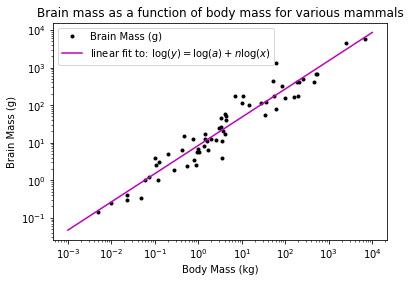

In [22]:
def power(x, a, n):
    y = a*x**n
    return y

#create arrays of values for our empirical model with the best-fit parameters
xfit = np.linspace(0.001,10000,1000) #do not start this at 0
yfit = power(xfit, a, n)

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("Brain mass as a function of body mass for various mammals")
plt.loglog(xdata, ydata, 'k.')
plt.loglog(xfit, yfit, 'm-', label='linear fit to: $\log(y)=\log(a)+n\log(x)$')
plt.xlabel('Body Mass (kg)')
plt.ylabel('Brain Mass (g)')
plt.legend()
plt.show()

This shows that the empirical model between brain mass and body mass is

$$m = 8.5M^{0.75}$$

where $m$ is the brain mass in grams and $M$ is the body mass in kilograms. Using this model, you can predict the brain mass of a 1000 kg mammal.

## Exercise

If a mammal has a body mass of 10 kg, what do you expect its brain mass to be? You can estimate with the graph, but verify your estimation by computing it with the empirical model.

## Exercise

If the brain mass of a mammal is 2 kg, what do you expect its body mass to be? You an estimate it from the graph, but you should also compute it.

## Example - Fiddler Crab

A [fiddler crab](https://scaquarium.org/our-animals/sand-fiddler-crab/) has one very large claw and one small claw. (The image is from [the SC Aquarium](https://scaquarium.org/our-animals/sand-fiddler-crab/).)

![](fiddler-crab.jpg)

The file `fiddler-crab.txt` has data for the length of its claw in mm and diameter of the crab in mm. ([data source](https://www.futurelearn.com/courses/maths-power-laws/0/steps/12170)) Find an emperical model that describes the length of the crab's claw as a function of the crab's diameter.

Begin by plotting the data.

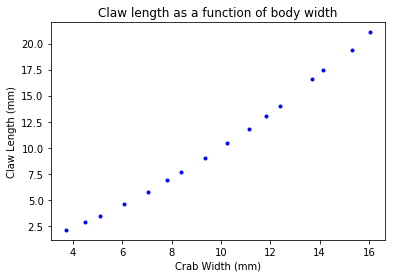

In [23]:
# read the data file
df = pd.read_csv('fiddler-crab.txt', sep='\t')
df.head()

# assign variable names to the columns of data; these variables are lists
xdata = df['Crab Size (mm)']
ydata = df['Claw Size (mm)']

# plot data
fig = plt.figure()
plt.title("Claw length as a function of body width")
plt.plot(xdata, ydata, 'b.')
plt.xlabel('Crab Width (mm)')
plt.ylabel('Claw Length (mm)')
plt.show()


Note that the data should go through the point (0,0) because if a crab has no body, then surely it has no claw. Therefore, it's reasonable that a power function might fit the data.

Plot the data on a log-log scale to see if it's linear.

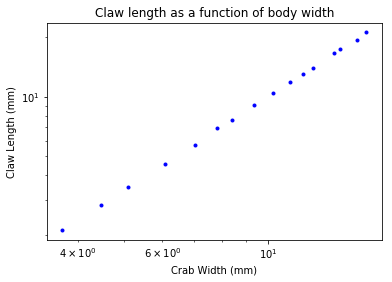

In [24]:
# plot data
fig = plt.figure()
plt.title("Claw length as a function of body width")
plt.loglog(xdata, ydata, 'b.')
plt.xlabel('Crab Width (mm)')
plt.ylabel('Claw Length (mm)')
plt.show()

The plot appears linear. Do a linear curve fit to $\log(y)$ vs $\log(x)$.

A linear fit to the log of the data gives: a =  0.2725708487685407 n= 1.5667629835740442


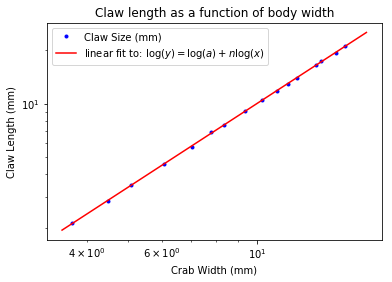

In [25]:
def model(x, m, b):
    y =  m*x + b
    return y

Lx = np.log10(xdata)
Ly = np.log10(ydata)
initial_guess = [1, 1] #initial guess of m, b
parameters, stats = curve_fit(model, Lx, Ly, p0=initial_guess)
n, La = parameters
a = 10**La

print("A linear fit to the log of the data gives: a = ", a, "n=",n)

def power(x, a, n):
    y = a*x**n
    return y

#create arrays of values for our empirical model with the best-fit parameters
xfit = np.linspace(3.5,18,100)
yfit = power(xfit, a, n)

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("Claw length as a function of body width")
plt.loglog(xdata, ydata, 'b.')
plt.loglog(xfit, yfit, 'r-', label='linear fit to: $\log(y)=\log(a)+n\log(x)$' )
plt.xlabel('Crab Width (mm)')
plt.ylabel('Claw Length (mm)')
plt.legend()
plt.show()

If we define the variable $L$ for claw length in mm and $W$ for crab width in mm, then we can write the empirical model as

$$L = 0.273W^{1.57}$$

## Exercise

Suppose you are walking on the beach and find a claw that was tragically separated from the crab. (Don't worry, they can [evidently grow another one on the other side after their next molt](https://en.wikipedia.org/wiki/Fiddler_crab).) The length of the claw is 4 mm. What was the width of the crab that lost the claw?

## Exercise

How does the mass of a trout scale with its length? Investigate it with data in the file `trout-length-width.txt`. ([data source](https://seattlecentral.edu/qelp/sets/023/023.html)) Determine an emperical model for the mass of a trout in grams as a function of its length in mm.

A linear fit to the log of the data gives: a =  5.390534863857478e-05 n= 2.724685759246223


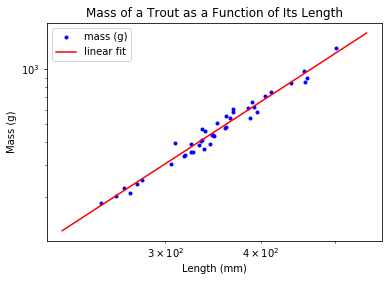

The mass of a trout can be determined from its length using M=5.39L^{2.72} where M is in grams and L is in mm.


In [26]:
# read the data file
df = pd.read_csv('trout-length-width.txt', sep='\t')
df.head()

# assign variable names to columns of data
xdata = df['length (mm)']
ydata = df['mass (g)']

# linear model for log-log plot
def model(x, m, b):
    y =  m*x + b
    return y

# find best fit parameters for a linear fit
Lx = np.log10(xdata)
Ly = np.log10(ydata)
initial_guess = [1, 1] #initial guess of m, b
parameters, stats = curve_fit(model, Lx, Ly, p0=initial_guess)
n, La = parameters
a = 10**La

print("A linear fit to the log of the data gives: a = ", a, "n=",n)

# power law for best-fit function
def power(x, a, n):
    y = a*x**n
    return y

# generate points for best-fit curve
xfit = np.linspace(220,550, 100)
yfit = power(Larray, a, n) #y=ax**n

# plot data with best-fit curve on a log-log plot
fig = plt.figure()
plt.title('Mass of a Trout as a Function of Its Length')
plt.loglog(xdata, ydata, 'b.')
plt.loglog(xfit, yfit, 'r-', label='linear fit')
plt.xlabel('Length (mm)')
plt.ylabel('Mass (g)')
plt.legend()
plt.show()

print("The mass of a trout can be determined from its length using M=5.39L^{2.72} where M is in grams and L is in mm.")
